In [1]:
import pandas as pd
import numpy as np
from pathlib import PurePosixPath, PureWindowsPath

In [2]:
def get_directory(path):
    if os.name == 'posix':
        return str(PurePosixPath(path))
    else:
        return str(PureWindowsPath(path))

In [3]:
# Variables
FERTILIZER_LOCATION = get_directory('../dataset/fertilizer')
TRAIN_SPLIT = 0.8
INPUT_HEADERS = ['temperature', 'humidity', 'ph', 'rainfall', 'is_maize', 'is_grape', 'is_apple', 'is_orange', 'label']

In [4]:
INPUT_HEADERS

['temperature',
 'humidity',
 'ph',
 'rainfall',
 'is_maize',
 'is_grape',
 'is_apple',
 'is_orange',
 'label']

In [5]:
_fert = pd.read_excel(get_directory(FERTILIZER_LOCATION + '/Fertilizer Prediction.xlsx'))
#_fert = pd.read_excel('./dataset/fertilizer/Fertilizer Prediction.xlsx')

In [6]:
_fert.head()

,N,P,K,temperature,humidity,ph,rainfall,label
0,71,54,16,22.613600,63.690706,5.749914,87.759539,maize
1,61,44,17,26.100184,71.574769,6.931757,102.266244,maize
2,80,43,16,23.558821,71.593514,6.657965,66.719955,maize
3,73,58,21,19.972160,57.682729,6.596061,60.651715,maize
4,61,38,20,18.478913,62.695039,5.970458,65.438354,maize


In [7]:
_fert.dtypes

N                int64
P                int64
K                int64
temperature    float64
humidity       float64
ph             float64
rainfall       float64
label           object
dtype: object

In [8]:
# Sanity check - now Label should be gone, replaced by one-hot encodings
_fert

,N,P,K,temperature,humidity,ph,rainfall,label
0,71,54,16,22.613600,63.690706,5.749914,87.759539,maize
1,61,44,17,26.100184,71.574769,6.931757,102.266244,maize
2,80,43,16,23.558821,71.593514,6.657965,66.719955,maize
3,73,58,21,19.972160,57.682729,6.596061,60.651715,maize
4,61,38,20,18.478913,62.695039,5.970458,65.438354,maize
...,...,...,...,...,...,...,...,...
395,27,30,5,32.717485,90.546083,7.656978,113.328978,orange
396,13,8,12,25.162966,92.547360,7.105905,114.311720,orange
397,6,7,7,27.681673,94.473169,7.199106,113.999515,orange
398,40,17,15,21.350934,90.949297,7.871063,107.086209,orange


In [9]:
_fert['label'] = pd.Categorical(_fert['label'])
_fert['label'] = _fert.label.cat.codes

In [10]:
_fert.head()

,N,P,K,temperature,humidity,ph,rainfall,label
0,71,54,16,22.613600,63.690706,5.749914,87.759539,2
1,61,44,17,26.100184,71.574769,6.931757,102.266244,2
2,80,43,16,23.558821,71.593514,6.657965,66.719955,2
3,73,58,21,19.972160,57.682729,6.596061,60.651715,2
4,61,38,20,18.478913,62.695039,5.970458,65.438354,2


In [11]:
_fert_N = _fert[['N', 'temperature', 'humidity', 'ph', 'rainfall', 'label']].copy()
_fert_P = _fert[['P', 'temperature', 'humidity', 'ph', 'rainfall', 'label']].copy()
_fert_K = _fert[['K', 'temperature', 'humidity', 'ph', 'rainfall', 'label']].copy()

In [12]:
# Labelling representation of each data
_fert_N.loc[:, 'target_output'] = 0
_fert_P.loc[:, 'target_output'] = 1
_fert_K.loc[:, 'target_output'] = 2

_fert_N.rename(columns = {'N': 'output'}, inplace=True)
_fert_P.rename(columns = {'P': 'output'}, inplace=True)
_fert_K.rename(columns = {'K': 'output'}, inplace=True)

In [13]:
# Sanity check
_fert_N

,output,temperature,humidity,ph,rainfall,label,target_output
0,71,22.613600,63.690706,5.749914,87.759539,2,0
1,61,26.100184,71.574769,6.931757,102.266244,2,0
2,80,23.558821,71.593514,6.657965,66.719955,2,0
3,73,19.972160,57.682729,6.596061,60.651715,2,0
4,61,18.478913,62.695039,5.970458,65.438354,2,0
...,...,...,...,...,...,...,...
395,27,32.717485,90.546083,7.656978,113.328978,3,0
396,13,25.162966,92.547360,7.105905,114.311720,3,0
397,6,27.681673,94.473169,7.199106,113.999515,3,0
398,40,21.350934,90.949297,7.871063,107.086209,3,0


In [14]:
_fert_K

,output,temperature,humidity,ph,rainfall,label,target_output
0,16,22.613600,63.690706,5.749914,87.759539,2,2
1,17,26.100184,71.574769,6.931757,102.266244,2,2
2,16,23.558821,71.593514,6.657965,66.719955,2,2
3,21,19.972160,57.682729,6.596061,60.651715,2,2
4,20,18.478913,62.695039,5.970458,65.438354,2,2
...,...,...,...,...,...,...,...
395,5,32.717485,90.546083,7.656978,113.328978,3,2
396,12,25.162966,92.547360,7.105905,114.311720,3,2
397,7,27.681673,94.473169,7.199106,113.999515,3,2
398,15,21.350934,90.949297,7.871063,107.086209,3,2


In [15]:
FERTILISER = _fert_N.copy()
FERTILISER = FERTILISER.append(
    _fert_P, 
    ignore_index=True).append(
        _fert_K,
        ignore_index=True
    )

FERTILISER

,output,temperature,humidity,ph,rainfall,label,target_output
0,71,22.613600,63.690706,5.749914,87.759539,2,0
1,61,26.100184,71.574769,6.931757,102.266244,2,0
2,80,23.558821,71.593514,6.657965,66.719955,2,0
3,73,19.972160,57.682729,6.596061,60.651715,2,0
4,61,18.478913,62.695039,5.970458,65.438354,2,0
...,...,...,...,...,...,...,...
1195,5,32.717485,90.546083,7.656978,113.328978,3,2
1196,12,25.162966,92.547360,7.105905,114.311720,3,2
1197,7,27.681673,94.473169,7.199106,113.999515,3,2
1198,15,21.350934,90.949297,7.871063,107.086209,3,2


In [16]:
# Data to see before deciding on normalisation: max values
FERTILISER.describe()

,output,temperature,humidity,ph,rainfall,label,target_output
count,1200.000000,1200.000000,1200.000000,1200.000000,1200.000000,1200.0000,1200.000000
mean,75.238333,22.908862,82.867767,6.304437,94.377141,1.5000,1.000000
std,70.161186,6.253690,11.493721,0.588955,20.189610,1.1185,0.816837
min,0.000000,8.825675,55.282204,5.510925,60.651715,0.0000,0.000000
25%,17.000000,19.723364,78.719580,5.839879,71.424148,0.7500,0.000000
50%,39.000000,22.705257,86.994867,6.206827,102.626226,1.5000,1.000000
75%,135.000000,25.190546,92.049560,6.552920,111.777102,2.2500,2.000000
max,205.000000,41.948657,94.964199,7.995849,124.983162,3.0000,2.000000


In [17]:
FERTILISER.reset_index().drop('index', axis=1)

,output,temperature,humidity,ph,rainfall,label,target_output
0,71,22.613600,63.690706,5.749914,87.759539,2,0
1,61,26.100184,71.574769,6.931757,102.266244,2,0
2,80,23.558821,71.593514,6.657965,66.719955,2,0
3,73,19.972160,57.682729,6.596061,60.651715,2,0
4,61,18.478913,62.695039,5.970458,65.438354,2,0
...,...,...,...,...,...,...,...
1195,5,32.717485,90.546083,7.656978,113.328978,3,2
1196,12,25.162966,92.547360,7.105905,114.311720,3,2
1197,7,27.681673,94.473169,7.199106,113.999515,3,2
1198,15,21.350934,90.949297,7.871063,107.086209,3,2


In [18]:
FERTILISER.dtypes

output             int64
temperature      float64
humidity         float64
ph               float64
rainfall         float64
label               int8
target_output      int64
dtype: object

In [19]:
# manually normalise
#FERTILISER.loc[:, 'output'] = FERTILISER['output'] / 205
#FERTILISER.loc[:, 'temperature'] = FERTILISER['temperature'] / 42
#FERTILISER.loc[:, 'humidity'] = FERTILISER['humidity'] / 95
#FERTILISER.loc[:, 'ph'] = FERTILISER['ph'] / 8
#FERTILISER.loc[:, 'rainfall'] = FERTILISER['rainfall'] / 125

In [20]:
FERTILISER = FERTILISER.sample(frac=1).reset_index().drop('index', axis=1)

FERTILISER_FEATURES = FERTILISER.copy().reset_index().drop('index', axis=1)
FERTILISER_LABEL = FERTILISER_FEATURES.pop('output')

FERTILISER_TRAIN = FERTILISER.loc[:int(len(FERTILISER) * TRAIN_SPLIT)].reset_index().drop('index', axis=1)
FERTILISER_TEST = FERTILISER.loc[int(len(FERTILISER) * TRAIN_SPLIT):].reset_index().drop('index', axis=1)

FERTILISER_TRAIN_FEATURES = FERTILISER_TRAIN.copy()
FERTILISER_TEST_FEATURES = FERTILISER_TEST.copy()

FERTILISER_TRAIN_LABEL = FERTILISER_TRAIN_FEATURES.pop('output')
FERTILISER_TEST_LABEL = FERTILISER_TEST_FEATURES.pop('output')

In [23]:
# Check if they're balanced or not
FERTILISER_TRAIN.describe()

,output,temperature,humidity,ph,rainfall,label,target_output
count,961.000000,961.000000,961.000000,961.000000,961.000000,961.000000,961.000000
mean,73.728408,22.937057,82.917768,6.312068,94.183757,1.511967,0.984391
std,70.004450,6.202390,11.412172,0.590414,20.369110,1.117154,0.819531
min,0.000000,8.825675,55.282204,5.510925,60.651715,0.000000,0.000000
25%,17.000000,19.893639,80.031000,5.852607,71.182894,1.000000,0.000000
50%,37.000000,22.750888,83.983517,6.207601,102.485293,2.000000,1.000000
75%,133.000000,25.260527,92.032728,6.562595,111.780373,3.000000,2.000000
max,205.000000,41.948657,94.964199,7.995849,124.983162,3.000000,2.000000


In [24]:
FERTILISER_TEST.describe()

,output,temperature,humidity,ph,rainfall,label,target_output
count,240.000000,240.000000,240.000000,240.000000,240.000000,240.000000,240.000000
mean,81.029167,22.748441,82.717663,6.276552,95.239780,1.458333,1.062500
std,70.595222,6.495430,11.839810,0.583666,19.477132,1.127042,0.802878
min,0.000000,9.851243,55.282204,5.510925,60.651715,0.000000,0.000000
25%,19.750000,19.201294,73.625484,5.798424,73.068630,0.000000,0.000000
50%,50.500000,22.587326,90.143626,6.206827,102.887178,1.500000,1.000000
75%,138.250000,24.806073,92.188849,6.525447,110.495049,2.000000,2.000000
max,205.000000,41.948657,94.964199,7.995849,124.983162,3.000000,2.000000


In [25]:
import seaborn as sns
#sns.pairplot(FERTILISER_TRAIN)

In [26]:
import tensorflow as tf
#fertiliser_train = df_to_dataset(FERTILISER_TRAIN)
#fertiliser_test = df_to_dataset(FERTILISER_TEST)
#dataset = dataset.shuffle(len(_fert)).batch(1)

INFO:tensorflow:Enabling eager execution
INFO:tensorflow:Enabling v2 tensorshape
INFO:tensorflow:Enabling resource variables
INFO:tensorflow:Enabling tensor equality
INFO:tensorflow:Enabling control flow v2


In [27]:
# Create a tf.Dataset
train_features = np.array(FERTILISER_TRAIN_FEATURES)
train_labels = np.array(FERTILISER_TRAIN_LABEL)

test_features = np.array(FERTILISER_TEST_FEATURES)
test_labels = np.array(FERTILISER_TEST_LABEL)

In [29]:
train_features[0]

array([0.50835557, 0.95736102, 0.98388288, 0.85668968, 3.        ,
       2.        ])

In [30]:
tf.keras.backend.clear_session()
tf.random.set_seed(51)
np.random.seed(51)

tf.keras.backend.clear_session()

# Define model
predict_fert = tf.keras.Sequential([
    tf.keras.layers.Dense(64, activation=tf.nn.relu),
    tf.keras.layers.Dense(1, activation=tf.nn.relu)
])

#predict_fert.summary()

In [31]:
#lr_schedule = tf.keras.callbacks.LearningRateScheduler(
#    lambda epoch: 1e-4 * 10**(epoch / 20))
optimizer = tf.keras.optimizers.SGD(learning_rate=1e-3, momentum=0.5)

predict_fert.compile(
    optimizer = optimizer,
    loss = tf.keras.losses.MSE,
    metrics = ['accuracy']
)

hist = predict_fert.fit(
    train_features, train_labels,
    #fertiliser,
    epochs = 300,
    validation_data = (test_features, test_labels),
#    callbacks = [lr_schedule]
 )

[==============================] - 0s 3ms/step - loss: 0.0096 - accuracy: 0.0208 - val_loss: 0.0109 - val_accuracy: 0.0125
Epoch 162/300
31/31 [==============================] - 0s 3ms/step - loss: 0.0097 - accuracy: 0.0206 - val_loss: 0.0109 - val_accuracy: 0.0125
Epoch 163/300
31/31 [==============================] - 0s 3ms/step - loss: 0.0090 - accuracy: 0.0162 - val_loss: 0.0109 - val_accuracy: 0.0125
Epoch 164/300
31/31 [==============================] - 0s 3ms/step - loss: 0.0090 - accuracy: 0.0261 - val_loss: 0.0108 - val_accuracy: 0.0125
Epoch 165/300
31/31 [==============================] - 0s 3ms/step - loss: 0.0089 - accuracy: 0.0244 - val_loss: 0.0107 - val_accuracy: 0.0125
Epoch 166/300
31/31 [==============================] - 0s 3ms/step - loss: 0.0087 - accuracy: 0.0207 - val_loss: 0.0106 - val_accuracy: 0.0125
Epoch 167/300
31/31 [==============================] - 0s 3ms/step - loss: 0.0091 - accuracy: 0.0211 - val_loss: 0.0106 - val_accuracy: 0.0125
Epoch 168/300
31/31

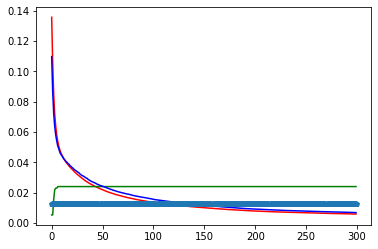

In [32]:
from matplotlib import pyplot as plt

plt.plot(
    range(len(hist.history['loss'])), hist.history['loss'], 'r',
    range(len(hist.history['accuracy'])), hist.history['accuracy'], 'g',
    range(len(hist.history['val_loss'])), hist.history['val_loss'], 'b',
    range(len(hist.history['val_accuracy'])), hist.history['val_accuracy'], 'p'
    )
plt.show()

#plt.semilogx(hist.history['lr'], hist.history['loss'])
#plt.show()

In [33]:
predict_fert.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense (Dense)                (None, 64)                448       
_________________________________________________________________
dense_1 (Dense)              (None, 1)                 65        
Total params: 513
Trainable params: 513
Non-trainable params: 0
_________________________________________________________________


In [34]:
predict_fert.predict(np.expand_dims(
    FERTILISER_TRAIN_FEATURES.loc[2].values,
    0
    ))

array([[0.16489643]], dtype=float32)

In [35]:
predict_fert.predict(np.expand_dims(
    FERTILISER_TRAIN_FEATURES.loc[0].values,
    0
    ))

array([[0.00857047]], dtype=float32)

In [36]:
predict_fert.predict(np.expand_dims(FERTILISER_TRAIN_FEATURES.loc[959].values, 0))

array([[0.3133835]], dtype=float32)

In [37]:
FERTILISER_TRAIN

,output,temperature,humidity,ph,rainfall,label,target_output
0,0.073171,0.508356,0.957361,0.983883,0.856690,3,2
1,0.960976,0.556006,0.956848,0.758907,0.904305,0,2
2,0.156098,0.246574,0.986911,0.974504,0.809166,3,0
3,0.419512,0.512894,0.627792,0.850491,0.878012,2,0
4,0.053659,0.274949,0.991038,0.988495,0.870631,3,2
...,...,...,...,...,...,...,...
956,0.365854,0.461869,0.656395,0.712026,0.487616,2,0
957,0.146341,0.508996,0.976005,0.696655,0.849134,0,0
958,0.995122,0.597883,0.876363,0.790685,0.584082,1,2
959,0.302439,0.516710,0.636576,0.838556,0.765711,2,0


In [38]:
# Output
print('Real:', FERTILISER_TRAIN.loc[0, 'output'] * 205)
print('Predicted:', predict_fert.predict(np.expand_dims(
    FERTILISER_TRAIN_FEATURES.loc[0].values,
    0
    )) * 205)

Real: 14.999999999999998
Predicted: [[1.7569463]]


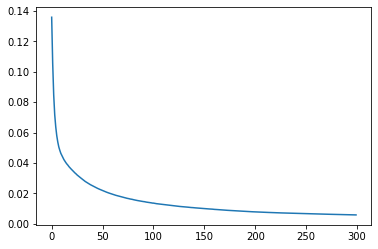

In [39]:
from matplotlib import pyplot as plt

plt.plot(range(len(hist.history['loss'])), hist.history['loss'])
plt.show()

In [42]:
predict_fert.save_weights('./weights/fertilizer-prediction/fertilizer-prediction')

In [44]:
predict_fert.save('./model/fertilizer-prediction')      # TF2 Save File
predict_fert.save('./model/fertilizer-prediction.h5')   # HDF5

INFO:tensorflow:Assets written to: ./model/fertilizer-prediction\assets
